In [1]:
from src.utils.Preprocessing import Preprocessing
from src.engine.RNN import EngineRNN
from config import FRAME_SIZE, SAMPLERATE, FRAME_SIZE, HOP, N_MELS, N_MFCC, OUT_DIM, DEVICE
from CremaD import CremaDDataset
from torch.utils.data import DataLoader
from src.utils.utils import plt_losses

# Entrenamiento de mejor modelo (sin augmentation)

In [2]:
preprocessing = Preprocessing(frame_size=FRAME_SIZE,
                  hop = HOP, 
                  n_mels =N_MELS, 
                  n_fft = FRAME_SIZE, 
                  n_mfcc=N_MFCC,
                  samplerate=SAMPLERATE)

In [3]:
model = EngineRNN(input_size = N_MFCC+N_MELS+2+12,
                         hidden_size = 128,
                         num_lstm_layers = 3,
                         num_mlp_layers = 1,
                         output_size = OUT_DIM, 
                         dropout = 0.1,
                         batch_size = 64,
                         learning_rate = 0.001,
                         preprocessing = preprocessing)

In [ ]:
%%capture
model.train(epochs=40,patience=10,delta=0.01,augmentation=False,name="GRU_sin_augmentation")

# Se carga modelo

In [4]:
model.load_model("GRU_sin_augmentation.pth")

c:\Users\sebas\Desktop\DL_señales\T2\src\engine\RNN.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path))


# Se evalúa modelo

Evaluación:   0%|          | 0/820 [00:00<?, ?it/s]

Evaluación: 100%|██████████| 820/820 [00:44<00:00, 18.28it/s]


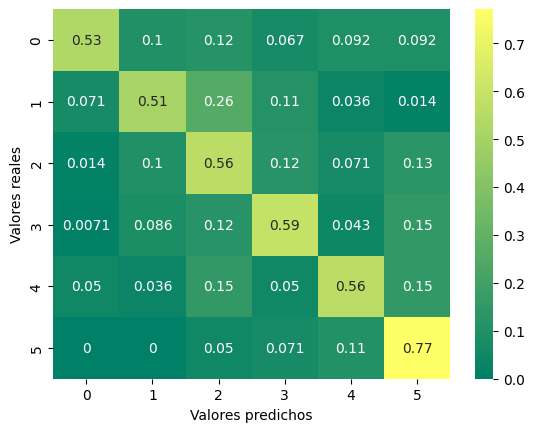

Accuracy: 0.5902438759803772


In [5]:
model.evaluate(DataLoader(CremaDDataset(dir="test",preprocessing = preprocessing),batch_size=1,shuffle=False))

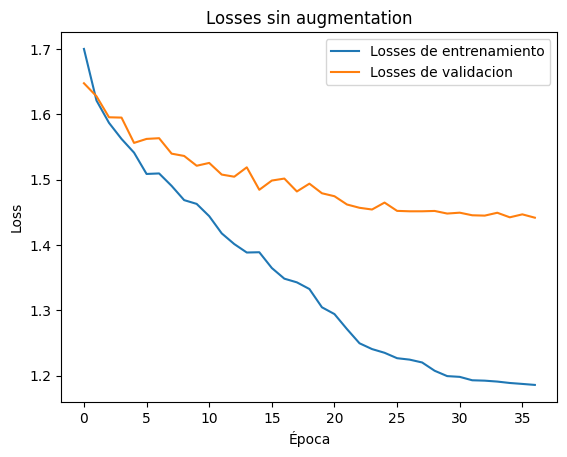

In [7]:
plt_losses("losses/sin_augmentation.csv","Losses sin augmentation")

# Se entrena modelo con augmentation 

Los tipos de augmentation se cambian en src/engine/RNN al editar la linea:

ds = torch.utils.data.ConcatDataset([ds_not_aug,ds_aug_speed,ds_aug_pitch,ds_aug_distortion]), quitando alguno de los ds_aug_speed,ds_aug_pitch,ds_aug_distortion.

In [8]:
model_aug = EngineRNN(input_size = N_MFCC+N_MELS+2+12,
                         hidden_size = 128,
                         num_lstm_layers = 3,
                         num_mlp_layers = 1,
                         output_size = OUT_DIM, 
                         dropout = 0.1,
                         batch_size = 64,
                         learning_rate = 0.001,
                         preprocessing = preprocessing)

In [ ]:
%%capture
model_aug.train(epochs=40,patience=10,delta=0.01,augmentation=True,name="GRU_augmentation")

# Se carga modelo

In [9]:
model_aug.load_model("GRU_augmentation.pth")

c:\Users\sebas\Desktop\DL_señales\T2\src\engine\RNN.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path))


Evaluación:   0%|          | 0/820 [00:00<?, ?it/s]

Evaluación: 100%|██████████| 820/820 [00:30<00:00, 26.55it/s]


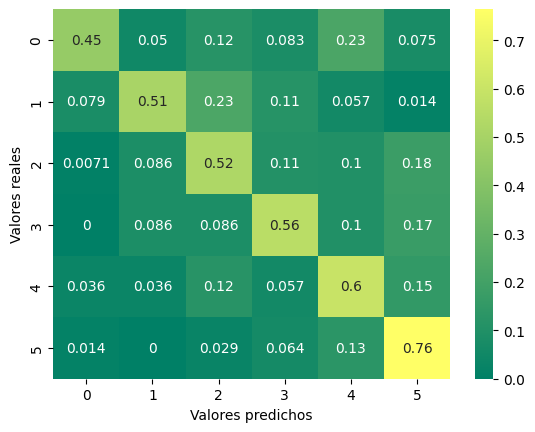

Accuracy: 0.5695121884346008


In [10]:
model_aug.evaluate(DataLoader(CremaDDataset(dir="test",preprocessing = preprocessing),batch_size=1,shuffle=False))

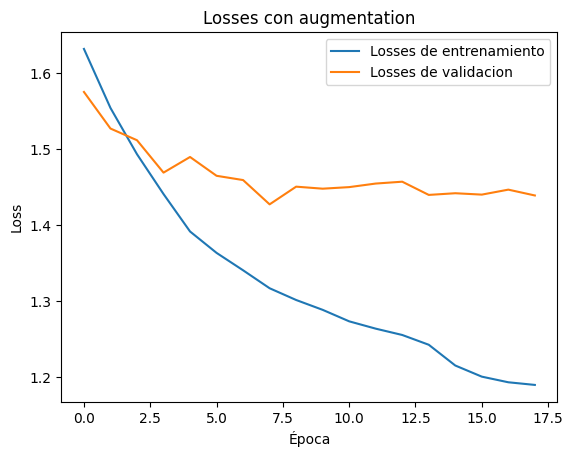

In [15]:
plt_losses("losses/con_augmentation.csv","Losses con augmentation")

# Cargar un modelo y predecir la clase de un audio

In [ ]:
from src.utils.Preprocessing import Preprocessing
from src.engine.RNN import EngineRNN
from config import FRAME_SIZE, SAMPLERATE, FRAME_SIZE, HOP, N_MELS, N_MFCC, OUT_DIM, DEVICE

In [3]:
#En path debe ir el .pth que contiene los pesos del modelo
path = "GRU_sin_augmentation.pth"
data_folder = "CREMA-D"
#El audio debe poder ser leido poniendo el path data_folder/audio
audio = "train/0.wav"

preprocessing = Preprocessing(frame_size=FRAME_SIZE,
                  hop = HOP, 
                  n_mels =N_MELS, 
                  n_fft = FRAME_SIZE, 
                  n_mfcc=N_MFCC,
                  samplerate=SAMPLERATE)

In [4]:
model = EngineRNN(input_size = N_MFCC+N_MELS+2+12,
                         hidden_size = 128,
                         num_lstm_layers = 3,
                         num_mlp_layers = 1,
                         output_size = OUT_DIM, 
                         dropout = 0.1,
                         batch_size = 64,
                         learning_rate = 0.001,
                         preprocessing = preprocessing)

In [5]:
#Se cargan pesos de modelo entrenado anteriormente
model.load_model("GRU_augmentation.pth")


c:\Users\sebas\Desktop\DL_señales\T2\src\engine\RNN.py:151: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path))


In [7]:
#Se predice la clase de un audio
model.predict_one(audio,data_folder)

Emoción real: Anger; Emoción predicha: Anger
